##  Setup and Imports



In [1]:
!pip install nlp

In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random



def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.12.0


## Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [3]:
!pip install -U datasets

In [4]:
import pandas as pd
import numpy as np



In [5]:
train=pd.read_csv("archive/training.csv")

In [6]:
test=pd.read_csv("archive/test.csv")

In [7]:
validation=pd.read_csv("archive/validation.csv")

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [9]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [11]:
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [12]:
def get_tweet(data):
    tweets=data['text'].tolist()
    labels=data['label'].tolist()
    
    return np.array(tweets),np.array(labels)
  

In [109]:
tweets,labels=get_tweet(train)
tweets

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong', ...,
       'i feel strong and good overall',
       'i feel like this was such a rude comment and im glad that t',
       'i know a lot but i feel so stupid because i can not portray it'],
      dtype='<U300')

In [14]:
for i in range(10):
    print(tweets[i],labels[i])
    print('\n')


i didnt feel humiliated 0


i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake 0


im grabbing a minute to post i feel greedy wrong 3


i am ever feeling nostalgic about the fireplace i will know that it is still on the property 2


i am feeling grouchy 3


ive been feeling a little burdened lately wasnt sure why that was 0


ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny 5


i feel as confused about life as a teenager or as jaded as a year old man 4


i have been with petronas for years i feel that petronas has performed well and made a huge profit 1


i feel romantic too 2




## Tokenizer, Padding and Truncating Sequences



In [57]:
def get_seq(tweets,tokenizer):
    maxlen=40
    
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    
    train_sequences = tokenizer.texts_to_sequences(tweets)
    train_padded = pad_sequences(train_sequences, padding='post', truncating='post', maxlen=maxlen)
    return np.array(train_padded)

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=10000,oov_token='<UNK>',)
tokenizer.fit_on_texts(tweets)
train_seq=get_seq(tweets,tokenizer)

In [59]:
train_seq=train_seq

In [60]:
tweets_val,labels_val=get_tweet(validation)

In [61]:
val_seq=get_seq(tweets_val,tokenizer)

## Visualization

In [62]:
tweets_val[0],labels_val[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [63]:
tweets[0],labels[0]

('i didnt feel humiliated', 0)

(array([4666.,    0.,    0.,    0., 5362.,    0.,    0.,    0., 1304.,
           0.,    0.,    0., 2159.,    0.,    0.,    0., 1937.,    0.,
           0.,  572.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

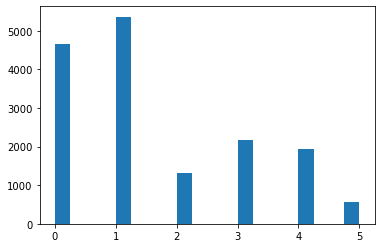

In [64]:
plt.hist(labels,bins=20)

(array([550.,   0.,   0.,   0., 704.,   0.,   0.,   0., 178.,   0.,   0.,
          0., 275.,   0.,   0.,   0., 212.,   0.,   0.,  81.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

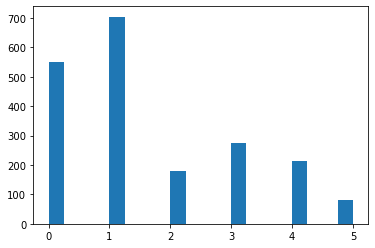

In [65]:
plt.hist(labels_val,bins=20)

In [66]:
val_seq[0],labels_val[0]

(array([ 17,   8, 157, 260,   4, 343,  16,  51,  19, 212,   1,  50,  10,
         13, 533,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0]),
 0)

## Creating the Model

1. Creating the model
2. Compiling the model

In [67]:
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D,Dropout

In [68]:
import tensorflow.keras as keras
from tensorflow.keras import layers

In [94]:
class Emotion(keras.Model):
    

    def __init__(self):
        super().__init__()
        self.embedding = Embedding(10000,16,input_length=40)
        self.LSTM1 = layers.Bidirectional(layers.LSTM(20,  return_sequences=True))
        self.LSTM2 = layers.Bidirectional(layers.LSTM(20))
        self.dropout=Dropout(0.3)
        self.dense = layers.Dense(6,activation='softmax')

    def call(self, inputs,training=False):
        x = self.embedding(inputs)
        y=self.LSTM1(x)
        z= self.LSTM2(y)
        if training:
            z = self.dropout(z,training=training)
        result = self.dense(z)
        return result
        #return tf.math.argmax(result,axis=1,output_type=tf.dtypes.int64,)

##  Training the Model

1. Preparing a validation set
2. Training the model

In [95]:
#labels=labels.astype('int64')

In [100]:
Emotion_model=Emotion()

In [101]:
optimizer = keras.optimizers.Adam(1e-3)
Emotion_model.compile(optimizer, loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [98]:
Earlystopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3,verbose=2,mode="max",)

In [102]:
hist=Emotion_model.fit(train_seq,labels,verbose=2,validation_data=(val_seq,labels_val),epochs=20)

Epoch 1/20
500/500 - 35s - loss: 1.3157 - accuracy: 0.4764 - val_loss: 0.7724 - val_accuracy: 0.7105 - 35s/epoch - 70ms/step
Epoch 2/20
500/500 - 21s - loss: 0.6314 - accuracy: 0.7488 - val_loss: 0.6294 - val_accuracy: 0.7735 - 21s/epoch - 43ms/step
Epoch 3/20
500/500 - 21s - loss: 0.4579 - accuracy: 0.8274 - val_loss: 0.5354 - val_accuracy: 0.8225 - 21s/epoch - 41ms/step
Epoch 4/20
500/500 - 21s - loss: 0.3014 - accuracy: 0.9015 - val_loss: 0.4740 - val_accuracy: 0.8675 - 21s/epoch - 43ms/step
Epoch 5/20
500/500 - 14s - loss: 0.2159 - accuracy: 0.9337 - val_loss: 0.4339 - val_accuracy: 0.8765 - 14s/epoch - 28ms/step
Epoch 6/20
500/500 - 12s - loss: 0.1714 - accuracy: 0.9475 - val_loss: 0.4129 - val_accuracy: 0.8760 - 12s/epoch - 23ms/step
Epoch 7/20
500/500 - 12s - loss: 0.1294 - accuracy: 0.9606 - val_loss: 0.4619 - val_accuracy: 0.8800 - 12s/epoch - 24ms/step
Epoch 8/20
500/500 - 12s - loss: 0.1176 - accuracy: 0.9634 - val_loss: 0.4327 - val_accuracy: 0.8835 - 12s/epoch - 24ms/step


##  Evaluating the Model

1. Visualizing training history
2. Prepraring a test set


In [103]:
test_tweets,test_labels=get_tweet(test)

In [104]:
test_seq=get_seq(test_tweets,tokenizer)

In [105]:
Emotion_model.evaluate(test_seq,test_labels)

63/63 [==============================] - 1s 9ms/step - loss: 0.5039 - accuracy: 0.8855


[0.5038781762123108, 0.8855000138282776]

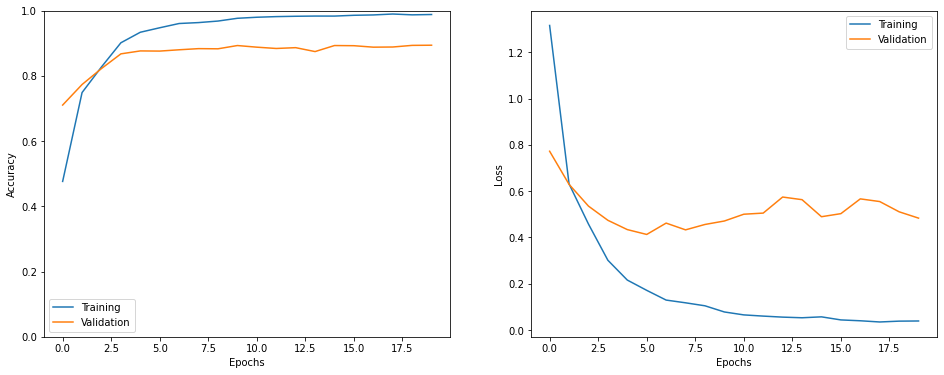

In [106]:
show_history(hist)

In [127]:
statement="It was really and overwhelmig experience"
statement=[statement]
seq=np.array(statement)



In [135]:
seq1=get_seq(seq,tokenizer)
def check_emotion(seq1):
    model=Emotion()
    dummy_input = tf.zeros((1, 40))  # Adjust the input shape if necessary
    model(dummy_input)
    model.load_weights("emotion_model_weights.h5")
    k=np.array(model.predict(seq1)).argmax()
    if(k==0):
        return "It feels like you are sad, take a song and make it better"
    if(k==1):
        return "It feels like you are feeling happy, be forever like this"
    if(k==2):
        return "It feels like u r feeling love, amazing"
    if(k==3):
        return "It feels like you are angry, please calm down and don't take any decision when u are angry!"
    if(k==4):
        return "It feels like u r feeing feared, it's ok but do not let it over you for long time"
    if(k==5):
        return "It feels like you are feeling surprised!"
    

In [136]:
check_emotion(seq1)

1/1 [==============================] - 1s 1s/step


'It feels like you are feeling happy, be forever like this'

In [122]:
Emotion_model.save_weights("emotion_model_weights.h5")

## Deploying on web

In [158]:
%%writefile app.py




import streamlit as st
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D,Dropout

from tensorflow.keras import layers


train=pd.read_csv("archive/training.csv")

def get_tweet(data):
    tweets=data['text'].tolist()
    labels=data['label'].tolist()
    
    return np.array(tweets),np.array(labels)

tweets,labels=get_tweet(train)

def get_seq(tweets,tokenizer):
    maxlen=40
    
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    
    train_sequences = tokenizer.texts_to_sequences(tweets)
    train_padded = pad_sequences(train_sequences, padding='post', truncating='post', maxlen=maxlen)
    return np.array(train_padded)


from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=10000,oov_token='<UNK>',)
tokenizer.fit_on_texts(tweets)



class Emotion(keras.Model):
    

    def __init__(self):
        super().__init__()
        self.embedding = Embedding(10000,16,input_length=40)
        self.LSTM1 = layers.Bidirectional(layers.LSTM(20,  return_sequences=True))
        self.LSTM2 = layers.Bidirectional(layers.LSTM(20))
        self.dropout=Dropout(0.3)
        self.dense = layers.Dense(6,activation='softmax')

    def call(self, inputs,training=False):
        x = self.embedding(inputs)
        y=self.LSTM1(x)
        z= self.LSTM2(y)
        if training:
            z = self.dropout(z,training=training)
        result = self.dense(z)
        return result
    




def check_emotion(seq1):
    model=Emotion()
    dummy_input = tf.zeros((1, 40))  # Adjust the input shape if necessary
    model(dummy_input)
    model.load_weights("emotion_model_weights.h5")
    k=np.array(model.predict(seq1)).argmax()
    if(k==0):
        return "It feels like you are sad, take a song and make it better"
    if(k==1):
        return "It feels like you are feeling happy, be forever like this"
    if(k==2):
        return "It feels like u r feeling love, amazing"
    if(k==3):
        return "It feels like you are angry, please calm down and don't take any decision when u are angry!"
    if(k==4):
        return "It feels like u r feeing feared, it's ok but do not let it over you for long time"
    if(k==5):
        return "It feels like you are feeling surprised!"
    
    
st.title("Tweet Emotion Recognition")
st.write("Enter a tweet to predict the emotion:")

def add_bg_from_url():
    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://c1.wallpaperflare.com/preview/944/1/109/depression-man-sadness-emotions.jpg");
             background-attachment: fixed;
             background-size: cover
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

add_bg_from_url() 
    
@st.cache(allow_output_mutation=True)
def load_curr_model():
    with st.spinner('Model is being loaded..'):
        model=Emotion()
        dummy_input = tf.zeros((1, 40))
        model(dummy_input)
        model.load_weights("emotion_model_weights.h5")
        return model
    
   

    # Get user input
statement = st.text_input("").lower()
    



    # Make a prediction when the user submits the input
if st.button("Predict"):
    if statement.strip() != "":
            # Predict the emotion
        statement=[statement]
        seq=np.array(statement)
        seq1=get_seq(seq,tokenizer)
        predicted_emotion = check_emotion(seq1)
        st.success(f"Predicted Emotion: {predicted_emotion}")
    else:
        st.warning("Please enter some text.")

# Run the app




st.write("\n\n By Abhishek Ambast.")








Overwriting app.py


In [159]:
!streamlit run app.py

^C
